In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Q(x):
    return stats.norm.sf(x)

In [3]:
fpr=[]
tpr=[]

for gamma in np.linspace(0,6,100):
    fpr+=[Q((gamma-2)/np.sqrt(1))] # Q(d/sigma), the tail
    tpr+=[1-Q(4-gamma)/np.sqrt(2)] # Q(d/sigma), the tail

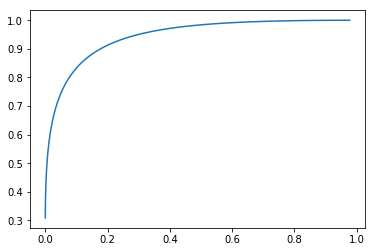

In [4]:
plt.plot(fpr,tpr)

In [5]:
ref=np.linspace(0,1,50)

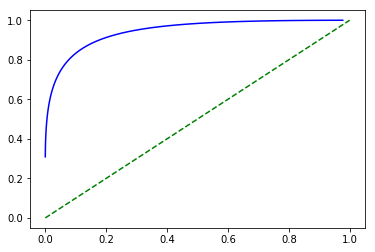

In [6]:
plt.plot(fpr,tpr,'b',ref,ref,'g--')

*Area Under Curve (AUC)* is a common measure of how good a test is. It is simply the area under the ROC curve. Just guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

In [7]:
np.trapz(np.flip(tpr),x=np.flip(fpr))

0.9215818678736559

### In-class Exercise

Plot the performance if the variance of each PSA test is reduced by a factor of 4. What is the AUC?

## MAP decision regions for Gaussian densities with equal variance

Let's use ```scipy.stats``` to find and plot the MAP decision regions

In [ ]:
def drawMAP(p0):
    G0=stats.norm(loc=1)
    G1=stats.norm(loc=-1)
    x=np.linspace(-4,4,1000)
    p1=1-p0
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.plot(x,p0*G0.pdf(x))
    plt.plot(x,p1*G1.pdf(x))
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    R0=x[np.where(p0*G0.pdf(x)>= p1*G1.pdf(x))]
    R1=x[np.where(p0*G0.pdf(x)< p1*G1.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R0,p0*G0.pdf(R0),alpha=0.3)
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3)
    
    # Print the MAP threshold
    print("MAP decision threshold is",R0[0])